In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [4]:

# Load the dataset
file_path = 'Data_file - data_file.csv'
data = pd.read_csv('/content/Data_file - data_file.csv')

In [5]:
# Handle missing values
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)

# Encode categorical data
data = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)

<ipython-input-5-e0988bfdd36f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)


In [6]:
# Feature selection
X = data.drop(columns=['median_house_value'])
y = data['median_house_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Make predictions
y_pred = model.predict(X_test)
print(y_pred)

[ 54055.44889899 124225.33893718 255489.37949165 ... 439180.9834118
 120797.55240621 183386.04993584]


In [9]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 4908476721.156606
R-squared: 0.6254240620553614


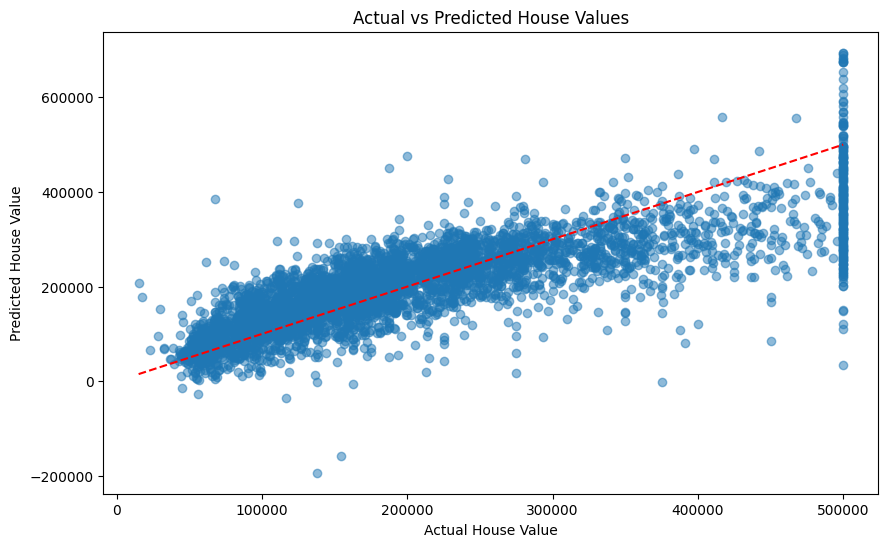

In [10]:
# Visualization of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Actual vs Predicted House Values")
plt.show()
